In [189]:
import numpy as np
import matplotlib.pyplot as plt
from gendat2_python import gendat2

In [190]:
# loads the sample data
x0, y0, x1, y1 = np.loadtxt('classasgntrain1.dat').T

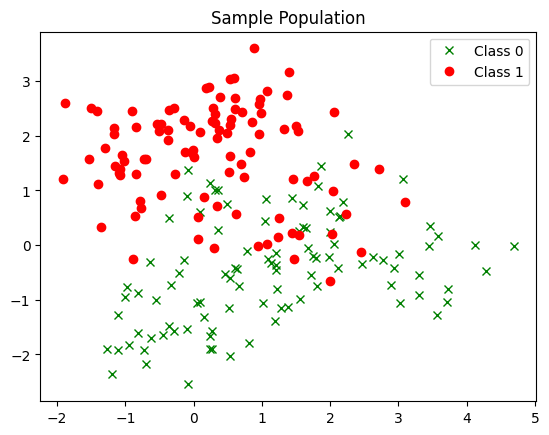

In [191]:
# this just plots the sample/given data
fig, ax = plt.subplots()
ax.plot(x0, y0, 'gx', label='Class 0')
ax.plot(x1, y1, 'ro', label='Class 1')
ax.legend()
plt.title("Sample Population")
plt.show()

In [192]:
# linear regression function from project 1
# NOTE: this didn't work on windows maybe
def linear_regression(x, y):
    X_aug = np.stack((np.ones(x.size), x), axis=1)
    Beta = np.dot(np.dot(np.linalg.pinv(np.dot(X_aug.T, X_aug)), X_aug.T), y)
    return Beta, X_aug

# gestimating an output given an input and a linear regression
# NOTE: this didn't work on windows maybe
def least_squares_est(x, beta):
    X_aug = np.stack((np.ones(x.size), x), axis=1)
    y_hat = np.dot(X_aug, beta)
    return y_hat

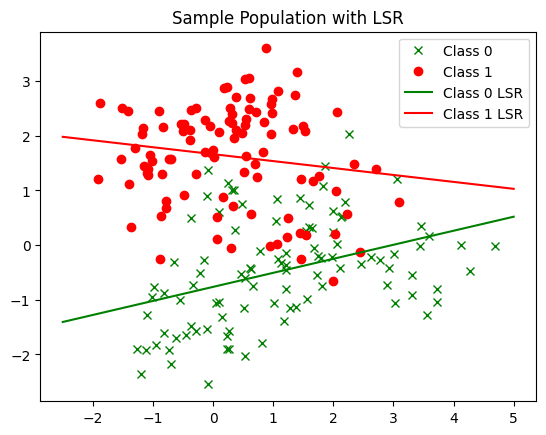

In [193]:
# build our linear regression models as our betas
beta0, _ = linear_regression(x0, y0)
beta1, _ = linear_regression(x1, y1)
# this is just used for drawing lines
x_extended = np.linspace(-2.5, 5, 100)
# feed x_extended into our linear regressen models to get the LSR lines
y0_hat = least_squares_est(x_extended, beta0)
y1_hat = least_squares_est(x_extended, beta1)
fig, ax = plt.subplots()
# plot our sample data
ax.plot(x0, y0, 'gx', label='Class 0')
ax.plot(x1, y1, 'ro', label='Class 1')
# plot our linear regression lines
ax.plot(x_extended, y0_hat, 'g', label='Class 0 LSR')
ax.plot(x_extended, y1_hat, 'r', label='Class 1 LSR')
ax.legend()
plt.title("Sample Population with LSR")
plt.show()

In [194]:
# this should generate some data based off the RECREATED gendat2 function the prof gave us
test_value = gendat2(0, 5000)
# run our generated data through our LSRs
y0_test = least_squares_est(test_value[0], beta0)
y1_test = least_squares_est(test_value[0], beta1)
# use this junk to sort our generated data
generated_class0x = np.array([])
generated_class0y = np.array([])
generated_class1x = np.array([])
generated_class1y = np.array([])
# basically if this is true that means we are closer to the class 1 LSR than the class 0 LSR
classification_array = np.abs(test_value[1] - y0_test) - np.abs(test_value[1] - y1_test) > 0
counter = 0
for i in classification_array:
    if i:
        generated_class1x = np.append(generated_class1x, test_value[0][counter])
        generated_class1y = np.append(generated_class1y, test_value[1][counter])
    else:
        generated_class0x = np.append(generated_class0x, test_value[0][counter])
        generated_class0y = np.append(generated_class0y, test_value[1][counter])
    counter += 1

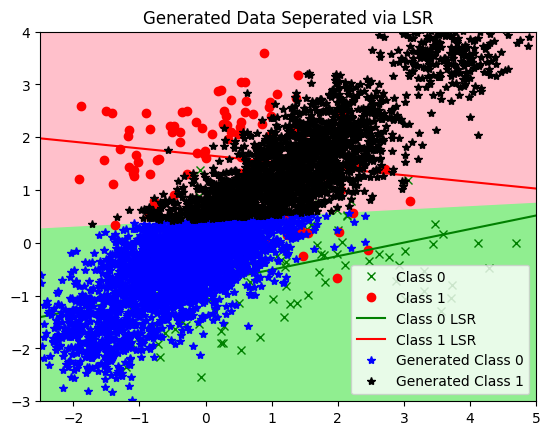

In [195]:
# this should be the line directly inbetween each LSR line
y_divider = least_squares_est(x_extended, (beta0+beta1)/2)
# these are used to be the top and bottom to fill the area on each side of the dividing line
fill_bottom_border = np.ones(x_extended.size)*(-10)
fill_top_border = np.ones(x_extended.size)*(10)
fig, ax = plt.subplots()
# plot sample data
ax.plot(x0, y0, 'gx', label='Class 0')
ax.plot(x1, y1, 'ro', label='Class 1')
# plot LSR lines
ax.plot(x_extended, y0_hat, 'g', label='Class 0 LSR')
ax.plot(x_extended, y1_hat, 'r', label='Class 1 LSR')
# plot generated data separated by class
ax.plot(generated_class0x, generated_class0y, 'b*', label='Generated Class 0')
ax.plot(generated_class1x, generated_class1y, '*', color='black', label='Generated Class 1')
# show the areas that each class has dominion over
ax.fill_between(x_extended, y_divider, fill_bottom_border, color='lightgreen')
ax.fill_between(x_extended, y_divider, fill_top_border, color='pink')
# zoom down to the parts we care about
ax.set(xlim=(-2.5, 5), ylim=(-3, 4))
ax.legend()
plt.title("Generated Data Seperated via LSR")
plt.show()